In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

### How many coin flips on average required until we get 3 consecutive heads?

In [2]:
trials, n = 1000, 0
tosses = []
for i in range(trials):
    cache = ['dud', 'dud', 'dud']
    t = 0
    while not cache[-3:] == [1, 1, 1]:
        cache.append(1 if random.randint(0, 1) < 1 else 0) # toss coin
        t += 1 
    n += t
    tosses.append(t)
print(f'average # of tosses to get 3 consecutive heads - {n / trials}')

average # of tosses to get 3 consecutive heads - 13.582


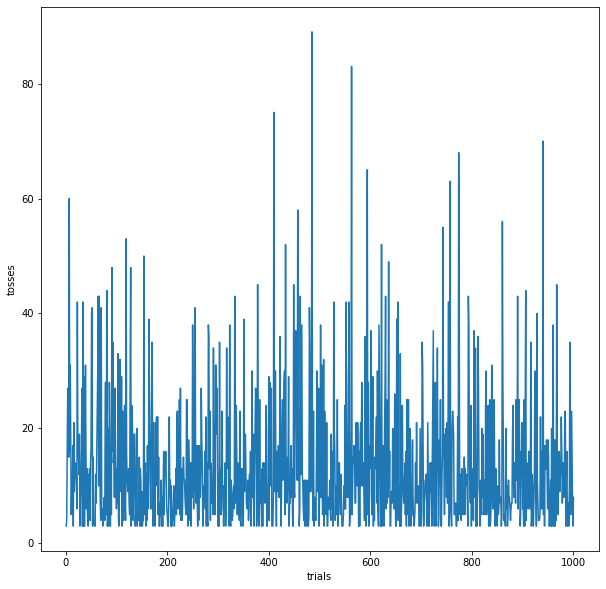

In [3]:
plt.figure(figsize=(10, 10))
plt.xlabel('trials')
plt.ylabel('tosses')
plt.plot(range(1, trials + 1), tosses)

### Markov chains!

In [4]:
class MarkovChain: # a markov chain is a directed graph - very simple to implement
    def __init__(self, order, size):
        self.order, self.size = order, size
        self.n, self.loop = 0, False
        self.vertices = [[] for i in range(order)] 
        self.visited = [False for i in range(order)]
        self.ordervis = []
    
    def reset(self):
        self.visited, self.ordervis = [False for i in range(self.order)], []
    
    def join(self, a, b, prob):
        self.vertices[a].append([b, prob])
    
    def traverse(self, cur):
        self.ordervis.append(cur)
        self.n += not self.visited[cur]
        self.visited[cur] = not self.loop
        cur = np.random.choice(range(self.order), p=[node[1] for node in self.vertices[cur]])
        if self.n != self.order: self.traverse(cur)
        self.n = 0
        return self.ordervis

In [5]:
coin = MarkovChain(2, 4) # 2 nodes and 4 edges

In [6]:
sample_space = [[0, 0], [0, 1], [1, 0], [1, 1]]
for s in sample_space:
     coin.join(s[0], s[1], 0.5)
coin.vertices

[[[0, 0.5], [1, 0.5]], [[0, 0.5], [1, 0.5]]]

In [7]:
trials, n = 1000, 0
lengths = []
for i in range(trials):
    coin.reset()
    length = len(coin.traverse(1))
    n += length
    lengths.append(length)
print(f'average path length - {n / trials}')

average path length - 2.993


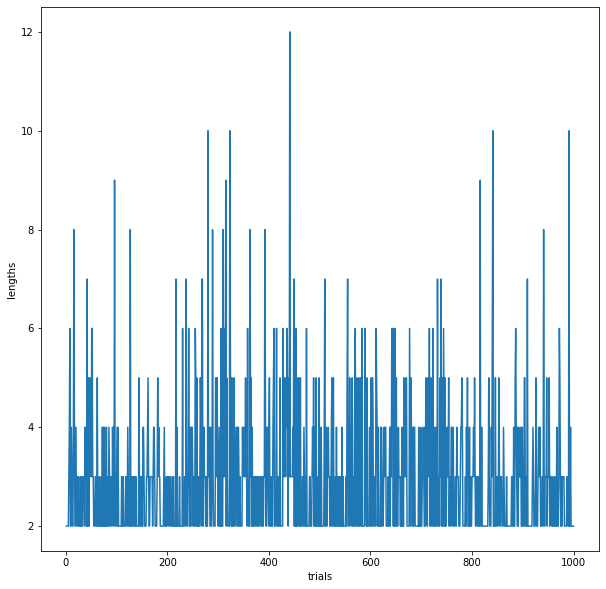

In [8]:
plt.figure(figsize=(10, 10))
plt.xlabel('trials')
plt.ylabel('lengths')
plt.plot(range(1, trials + 1), lengths)